# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images


Done extracting features for 3000 / 49000 images


Done extracting features for 4000 / 49000 images


Done extracting features for 5000 / 49000 images


Done extracting features for 6000 / 49000 images


Done extracting features for 7000 / 49000 images


Done extracting features for 8000 / 49000 images


Done extracting features for 9000 / 49000 images


Done extracting features for 10000 / 49000 images


Done extracting features for 11000 / 49000 images


Done extracting features for 12000 / 49000 images


Done extracting features for 13000 / 49000 images


Done extracting features for 14000 / 49000 images


Done extracting features for 15000 / 49000 images


Done extracting features for 16000 / 49000 images


Done extracting features for 17000 / 49000 images


Done extracting features for 18000 / 49000 images


Done extracting features for 19000 / 49000 images


Done extracting features for 20000 / 49000 images


Done extracting features for 21000 / 49000 images


Done extracting features for 22000 / 49000 images


Done extracting features for 23000 / 49000 images


Done extracting features for 24000 / 49000 images


Done extracting features for 25000 / 49000 images


Done extracting features for 26000 / 49000 images


Done extracting features for 27000 / 49000 images


Done extracting features for 28000 / 49000 images


Done extracting features for 29000 / 49000 images


Done extracting features for 30000 / 49000 images


Done extracting features for 31000 / 49000 images


Done extracting features for 32000 / 49000 images


Done extracting features for 33000 / 49000 images


Done extracting features for 34000 / 49000 images


Done extracting features for 35000 / 49000 images


Done extracting features for 36000 / 49000 images


Done extracting features for 37000 / 49000 images


Done extracting features for 38000 / 49000 images


Done extracting features for 39000 / 49000 images


Done extracting features for 40000 / 49000 images


Done extracting features for 41000 / 49000 images


Done extracting features for 42000 / 49000 images


Done extracting features for 43000 / 49000 images


Done extracting features for 44000 / 49000 images


Done extracting features for 45000 / 49000 images


Done extracting features for 46000 / 49000 images


Done extracting features for 47000 / 49000 images


Done extracting features for 48000 / 49000 images

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [6]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 1e4]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for i in range(len(learning_rates)):
    alpha=learning_rates[i]
    reg=regularization_strengths[i]
    s = LinearSVM()
    s.train(X_train_feats,y_train,learning_rate=alpha, reg=reg,
            num_iters=1500, verbose=True)
    y_pred = s.predict(X_train_feats)
    train_acc= (np.mean(y_train == y_pred) )
    y_val_pred = s.predict(X_val_feats)
    val_acc=(np.mean(y_val == y_val_pred))
    results[(alpha,reg)]=(train_acc, val_acc)
    if(val_acc>best_val):
        best_val=val_acc
        best_svm=s

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 88.204171
iteration 100 / 1500: loss 86.631713


iteration 200 / 1500: loss 85.106657


iteration 300 / 1500: loss 83.577125


iteration 400 / 1500: loss 82.107265


iteration 500 / 1500: loss 80.660739


iteration 600 / 1500: loss 79.237380


iteration 700 / 1500: loss 77.853249


iteration 800 / 1500: loss 76.500563


iteration 900 / 1500: loss 75.144117


iteration 1000 / 1500: loss 73.832433


iteration 1100 / 1500: loss 72.549490


iteration 1200 / 1500: loss 71.293422


iteration 1300 / 1500: loss 70.064676


iteration 1400 / 1500: loss 68.844683


iteration 0 / 1500: loss 843.553169


iteration 100 / 1500: loss 120.817178


iteration 200 / 1500: loss 23.983391


iteration 300 / 1500: loss 11.007152


iteration 400 / 1500: loss 9.268603


iteration 500 / 1500: loss 9.036069
iteration 600 / 1500: loss 9.004785


iteration 700 / 1500: loss 9.000607


iteration 800 / 1500: loss 9.000054
iteration 900 / 1500: loss 8.999970


iteration 1000 / 1500: loss 8.999965


iteration 1100 / 1500: loss 8.999964


iteration 1200 / 1500: loss 8.999960


iteration 1300 / 1500: loss 8.999966


iteration 1400 / 1500: loss 8.999968


iteration 0 / 1500: loss 24.738284


iteration 100 / 1500: loss 19.538252
iteration 200 / 1500: loss 16.051286


iteration 300 / 1500: loss 13.734501
iteration 400 / 1500: loss 12.172309


iteration 500 / 1500: loss 11.123449


iteration 600 / 1500: loss 10.421807
iteration 700 / 1500: loss 9.951428


iteration 800 / 1500: loss 9.637981
iteration 900 / 1500: loss 9.426968


iteration 1000 / 1500: loss 9.285100
iteration 1100 / 1500: loss 9.191568


iteration 1200 / 1500: loss 9.127569
iteration 1300 / 1500: loss 9.083996


iteration 1400 / 1500: loss 9.056744
lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.089531 val accuracy: 0.096000


lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.414082 val accuracy: 0.412000
lr 1.000000e-07 reg 1.000000e+04 train accuracy: 0.192796 val accuracy: 0.200000
best validation accuracy achieved during cross-validation: 0.412000


In [7]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.421


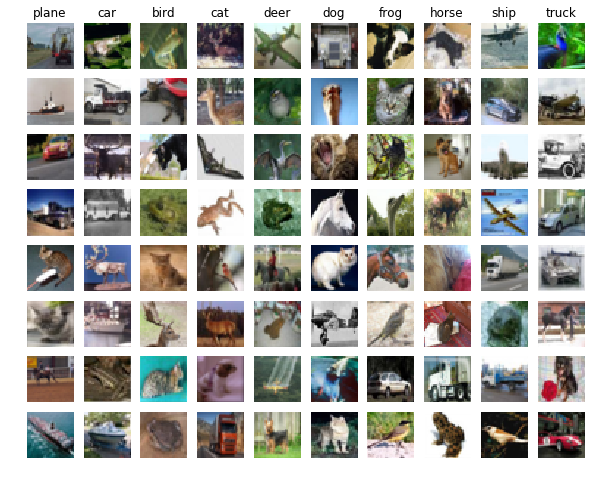

In [9]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [ ]:
print(X_train_feats.shape)

Validation accuracy:  0.566
Training accurace :  0.617959183673


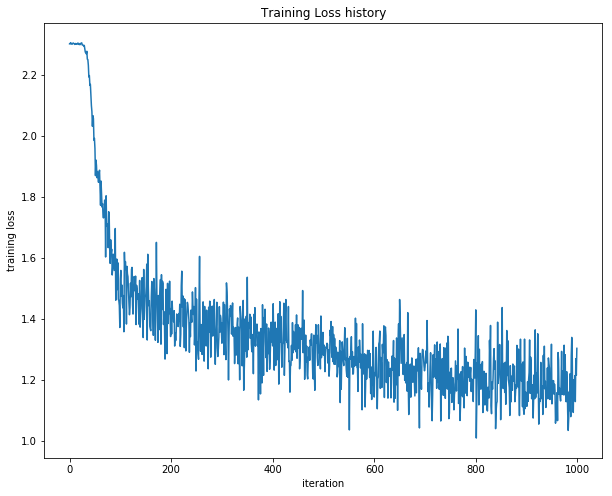

Validation accuracy:  0.565
Training accurace :  0.636510204082


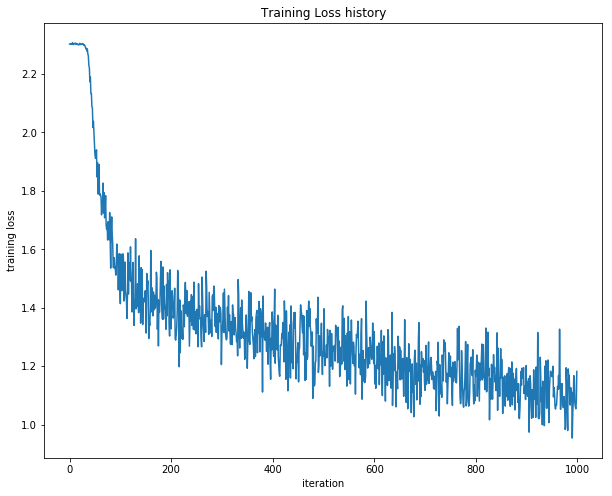

Validation accuracy:  0.572
Training accurace :  0.621428571429


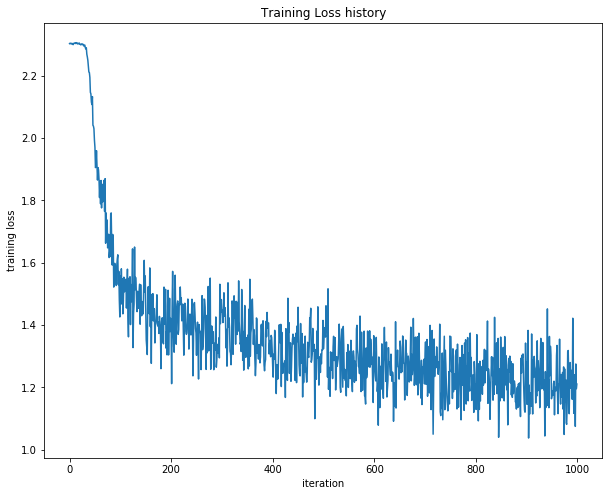

Validation accuracy:  0.546
Training accurace :  0.565816326531


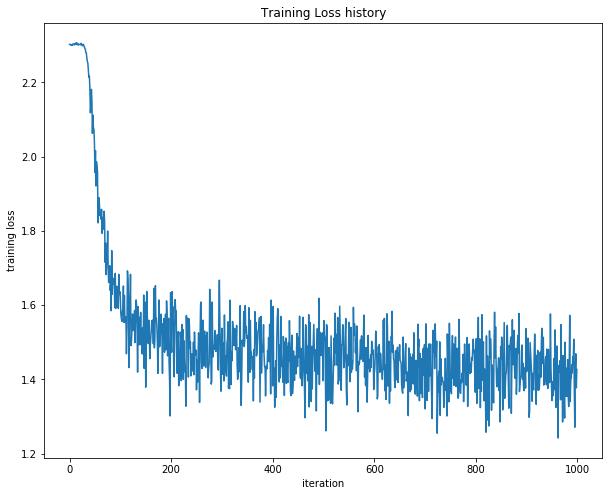

Validation accuracy:  0.506
Training accurace :  0.527857142857


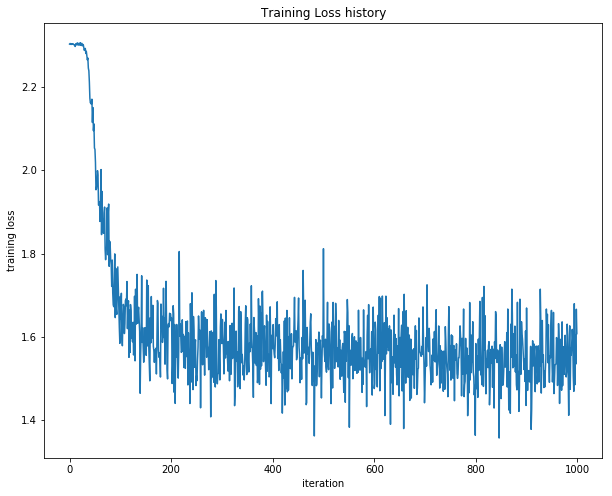

Validation accuracy:  0.5
Training accurace :  0.500632653061


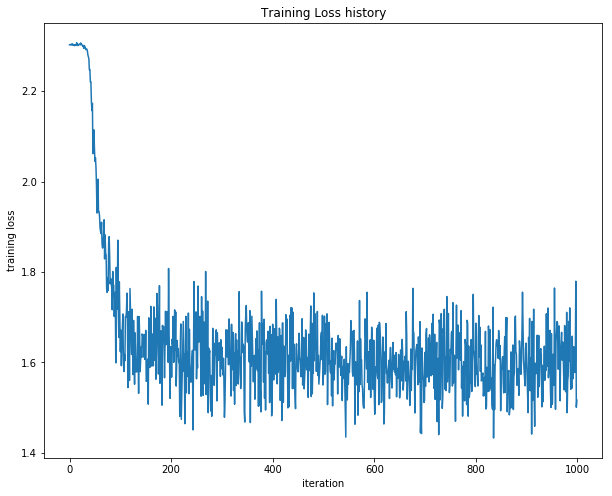

Validation accuracy:  0.401
Training accurace :  0.414367346939


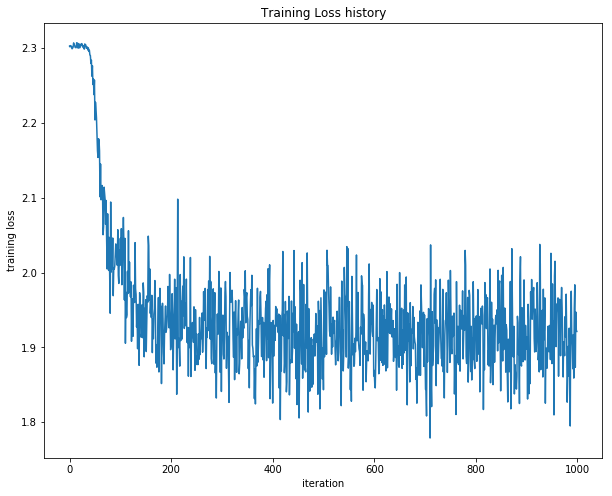

Validation accuracy:  0.376
Training accurace :  0.374795918367


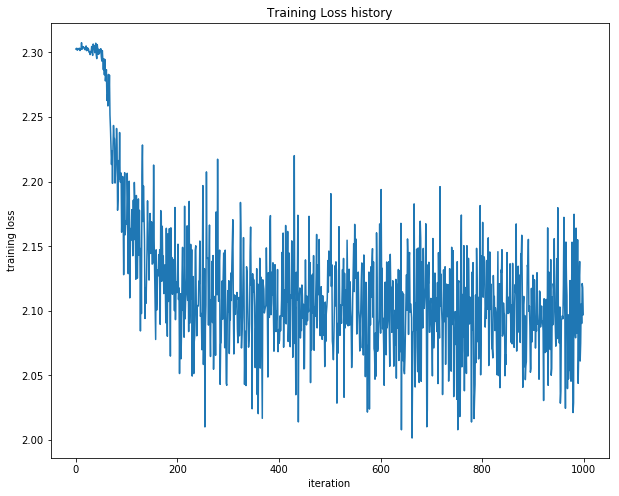

Validation accuracy:  0.327
Training accurace :  0.339285714286


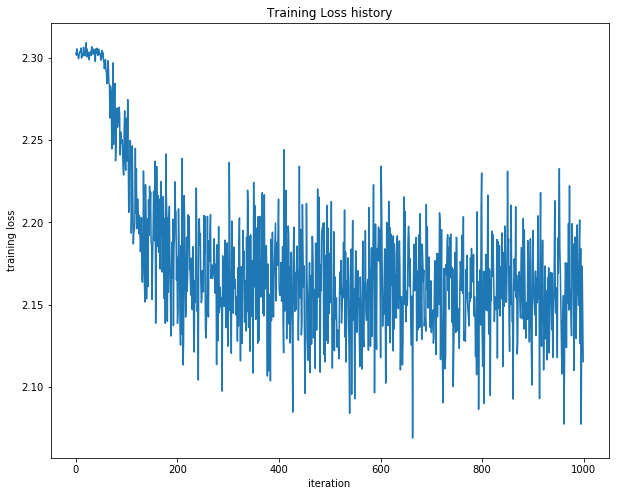

Validation accuracy:  0.156
Training accurace :  0.18093877551


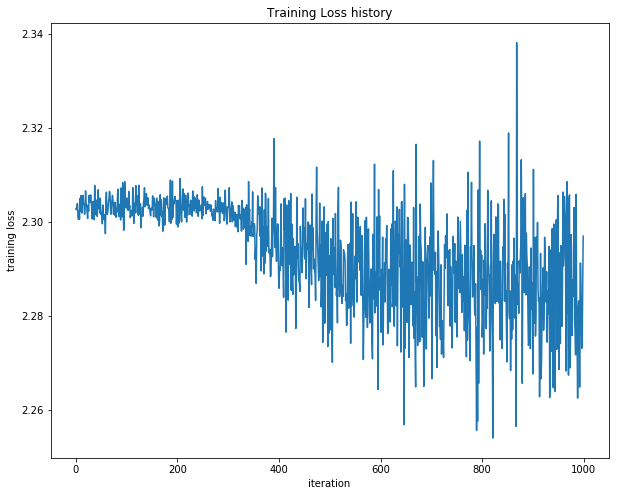

lr 5.000000e-01 reg 4.000000e-04 train accuracy: 0.636510 val accuracy: 0.565000
lr 5.000000e-01 reg 8.000000e-04 train accuracy: 0.617959 val accuracy: 0.566000
lr 5.000000e-01 reg 1.000000e-03 train accuracy: 0.621429 val accuracy: 0.572000
lr 5.000000e-01 reg 4.000000e-03 train accuracy: 0.565816 val accuracy: 0.546000
lr 5.000000e-01 reg 8.000000e-03 train accuracy: 0.527857 val accuracy: 0.506000
lr 5.000000e-01 reg 1.000000e-02 train accuracy: 0.500633 val accuracy: 0.500000
lr 5.000000e-01 reg 4.000000e-02 train accuracy: 0.414367 val accuracy: 0.401000
lr 5.000000e-01 reg 8.000000e-02 train accuracy: 0.374796 val accuracy: 0.376000
lr 5.000000e-01 reg 1.000000e-01 train accuracy: 0.339286 val accuracy: 0.327000
lr 5.000000e-01 reg 2.000000e-01 train accuracy: 0.180939 val accuracy: 0.156000
best validation accuracy achieved during cross-validation: 0.572000


In [23]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
learning_rates= (5e-1)* np.ones((10,))
#learning_rates = [1e-4,1e-3, 5e-2,4e-2, 2.5e-2, 1e-2,3e-2,2e-2,8e-1,4e-1]
regularization_strengths =[0.0008,0.0004,0.001 , 0.004,0.008, 0.01, 0.04, 0.08,0.1, 0.2]
#regularization_strengths=0.04*np.zeros((10,))
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.

for i in range(len(learning_rates)):
    alpha=learning_rates[i]
    lam=regularization_strengths[i]
    mynet = TwoLayerNet(input_dim, hidden_dim, num_classes)

    # Train the network
    mystats = mynet.train(X_train_feats, y_train, X_val_feats, y_val,
                          num_iters=1000, batch_size=200,
                          learning_rate=alpha, learning_rate_decay=0.95,
                          reg=lam, verbose=False)

    # Predict on the validation set

    y_pred = mynet.predict(X_train_feats)
    train_acc= (np.mean(y_train == y_pred) )
    y_val_pred = mynet.predict(X_val_feats)
    val_acc=(np.mean(y_val == y_val_pred))
    print('Validation accuracy: ', val_acc)
    print('Training accurace : ' , train_acc)
    results[(alpha,lam)]=(train_acc, val_acc)
    if(val_acc>best_val):
        best_val=val_acc
        best_net=mynet

    plt.plot(mystats['loss_history'])
    plt.xlabel('iteration')
    plt.ylabel('training loss')
    plt.title('Training Loss history')
    plt.show()

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
        lr, reg, train_accuracy, val_accuracy))

print('best validation accuracy achieved during cross-validation: %f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [19]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.56


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!